In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


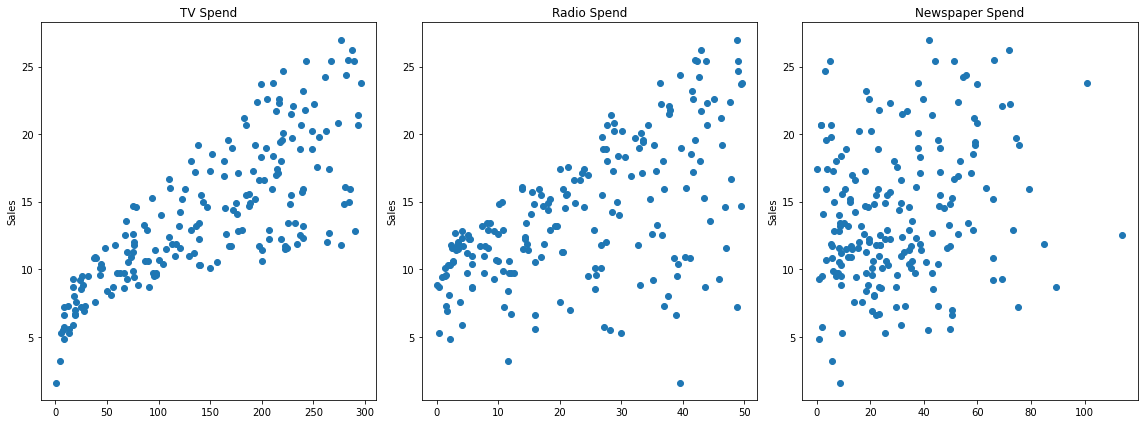

In [6]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

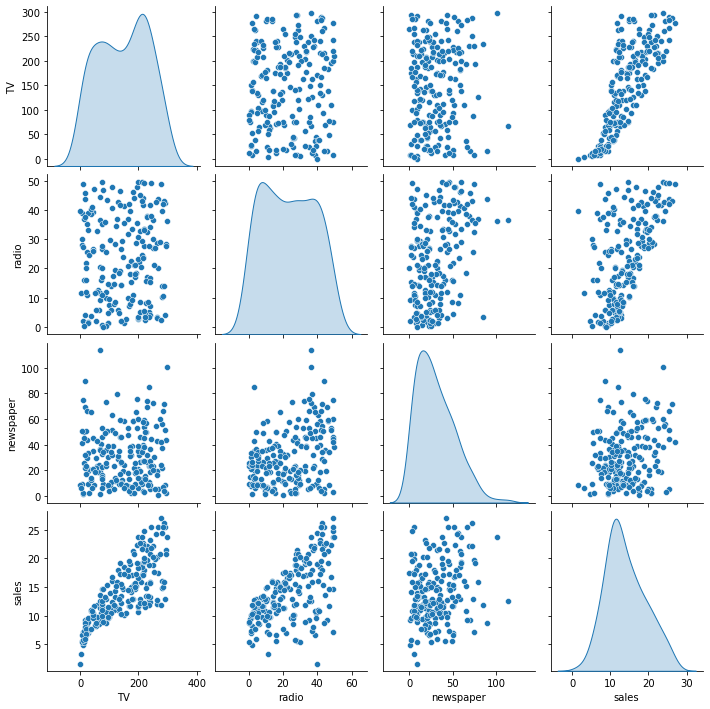

In [7]:
sns.pairplot(df,diag_kind='kde')

In [8]:
X=df.drop('sales',axis=1)
y=df['sales']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [12]:
X_train

,TV,radio,newspaper
16,67.8,36.6,114.0
186,139.5,2.1,26.6
144,96.2,14.8,38.9
121,18.8,21.7,50.4
80,76.4,26.7,22.3
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [13]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [14]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
Name: sales, dtype: float64

In [15]:
y_train

16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 160, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtr

In [18]:
model=LinearRegression()
model

LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
test_predictions=model.predict(X_test)
test_predictions

array([15.68292592, 19.58907536, 11.33442246, 16.97160642,  9.00229777,
        6.8258424 , 20.28370847, 17.25050474,  9.62422935, 19.21261943,
       12.28165709, 13.79124205, 13.63171832, 21.3166205 , 18.4260183 ,
        9.83360121, 15.48826256,  7.50717778,  7.37608168, 20.40569824,
        7.61221263, 18.21702553, 24.75227276, 22.87105326,  7.79566192,
       12.55620637, 21.47155589,  7.89397664, 12.3119109 , 12.41822104,
       10.6650977 , 19.23984433,  9.92216352,  6.53329195, 17.27904496,
        7.60035587,  9.1023379 ,  8.10416927, 10.45284718, 10.49584758])

In [21]:
y_train

16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 160, dtype: float64

In [22]:
model.predict(X_train)

array([12.95763215,  9.63077656, 10.08367614,  7.88900532, 11.44192114,
        9.93682953,  8.82788656, 16.21463981, 13.16403148, 20.83312719,
       12.39544607, 13.88247624, 17.5265711 , 11.00739899, 12.45756496,
        5.29203263, 23.32021059, 12.49993089, 18.73940927, 15.12059581,
       15.17165128, 24.12485492,  6.53916513, 19.96960278, 13.8127193 ,
       21.22682862, 15.42432138, 15.34466103, 15.62958998, 16.98123228,
       14.19983405,  8.12353321, 18.50640058,  6.52040422,  8.76634584,
       20.64173439, 13.59933116, 23.24438746,  8.58088402, 15.05788881,
       18.27528345, 12.37543959,  6.53956333, 20.76531046, 18.44056944,
       16.96292468,  4.46837451, 13.26821567, 20.21493415, 12.6926269 ,
        4.49165524, 14.63739134, 14.02020947,  9.15172051, 12.52459761,
       14.40927064,  8.85745633, 13.78057393, 12.72643819, 10.1792344 ,
       11.97248167, 24.08144233,  9.62826976, 11.92360865, 16.46694274,
       18.88863683,  3.57810432, 16.28769588, 23.25911422, 12.10

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE=mean_absolute_error(y_test,test_predictions)
MAE

1.1244750006255646

In [25]:
mean_absolute_error(y_train,model.predict(X_train))

1.2907218211025218

In [26]:
MSE=mean_squared_error(y_test,test_predictions)
MSE

2.063418850121476

In [27]:
mean_squared_error(y_train,model.predict(X_train))

2.9689180892819724

In [28]:
RMSE=np.sqrt(MSE)
RMSE

1.43646052856369

In [29]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.723054871233639

In [30]:
df['sales'].mean()

14.022500000000003

In [31]:
quartet=pd.read_csv('anscombes_quartet1.csv')
quartet

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


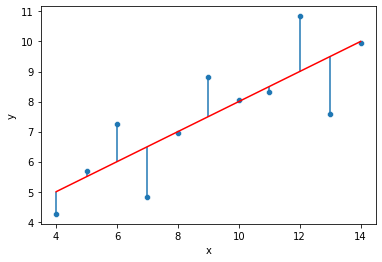

In [32]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['pred_y'])

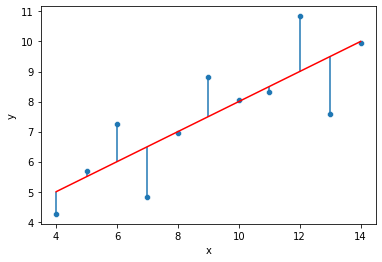

In [33]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['pred_y'],quartet['y'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

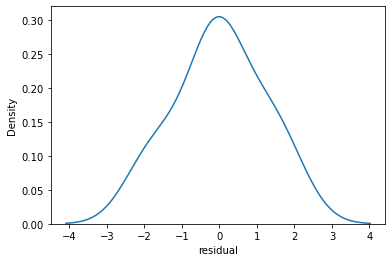

In [34]:
sns.kdeplot(x=quartet['residual'])

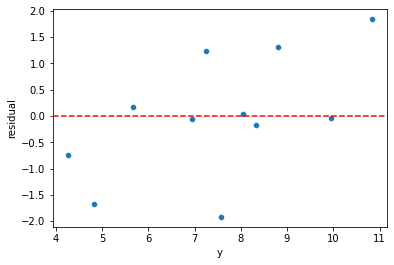

In [35]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(ls='--',c='r')

In [36]:
quartet2=pd.read_csv('anscombes_quartet2.csv')

In [37]:
quartet2

,x,y
0,10.0,9.14
1,8.0,8.14
2,13.0,8.74
3,9.0,8.77
4,11.0,9.26
5,14.0,8.10
6,6.0,6.13
7,4.0,3.10
8,12.0,9.13
9,7.0,7.26


In [38]:
quartet.columns

Index(['x', 'y', 'pred_y', 'residual'], dtype='object')

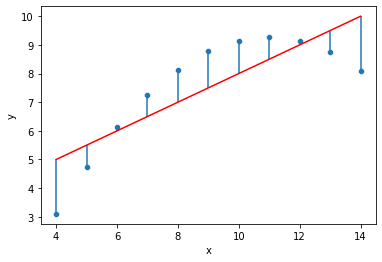

In [39]:
# y = 3.00 + 0.500x
quartet2['pred_y'] = 3 + 0.5 * quartet2['x']
quartet2['residual'] = quartet2['y'] - quartet2['pred_y']

sns.scatterplot(data=quartet2,x='x',y='y')
sns.lineplot(data=quartet2,x='x',y='pred_y',color='red')
plt.vlines(quartet2['x'],quartet2['y'],quartet2['pred_y'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

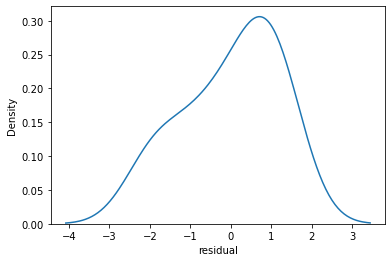

In [40]:
sns.kdeplot(quartet2['residual'])

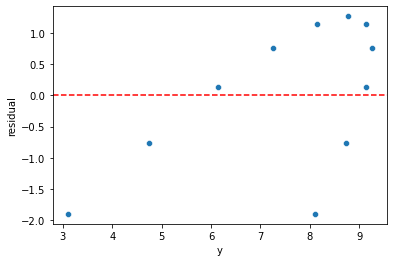

In [41]:
sns.scatterplot(x='y',y='residual',data=quartet2)
plt.axhline(ls='--',c='r')

In [42]:
quartet4=pd.read_csv('anscombes_quartet4.csv')

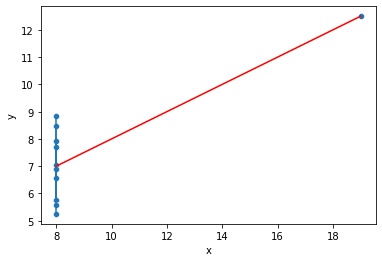

In [43]:
# y = 3.00 + 0.500x
quartet4['pred_y'] = 3 + 0.5 * quartet4['x']
quartet4['residual'] = quartet4['y'] - quartet4['pred_y']

sns.scatterplot(data=quartet4,x='x',y='y')
sns.lineplot(data=quartet4,x='x',y='pred_y',color='red')
plt.vlines(quartet4['x'],quartet4['y'],quartet4['pred_y'])

<AxesSubplot:xlabel='residual', ylabel='Density'>

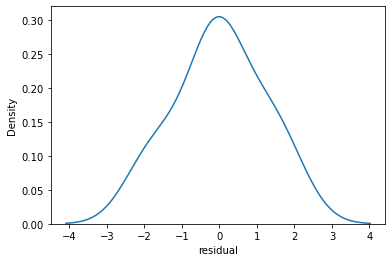

In [44]:
sns.kdeplot(quartet['residual'])

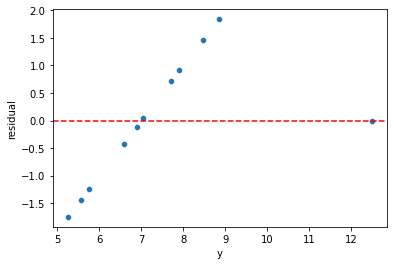

In [45]:
sns.scatterplot(x='y',y='residual',data=quartet4)
plt.axhline(ls='--',c='r')

In [46]:
test_predictions

array([15.68292592, 19.58907536, 11.33442246, 16.97160642,  9.00229777,
        6.8258424 , 20.28370847, 17.25050474,  9.62422935, 19.21261943,
       12.28165709, 13.79124205, 13.63171832, 21.3166205 , 18.4260183 ,
        9.83360121, 15.48826256,  7.50717778,  7.37608168, 20.40569824,
        7.61221263, 18.21702553, 24.75227276, 22.87105326,  7.79566192,
       12.55620637, 21.47155589,  7.89397664, 12.3119109 , 12.41822104,
       10.6650977 , 19.23984433,  9.92216352,  6.53329195, 17.27904496,
        7.60035587,  9.1023379 ,  8.10416927, 10.45284718, 10.49584758])

In [47]:
test_predictions=model.predict(X_test)
test_predictions

array([15.68292592, 19.58907536, 11.33442246, 16.97160642,  9.00229777,
        6.8258424 , 20.28370847, 17.25050474,  9.62422935, 19.21261943,
       12.28165709, 13.79124205, 13.63171832, 21.3166205 , 18.4260183 ,
        9.83360121, 15.48826256,  7.50717778,  7.37608168, 20.40569824,
        7.61221263, 18.21702553, 24.75227276, 22.87105326,  7.79566192,
       12.55620637, 21.47155589,  7.89397664, 12.3119109 , 12.41822104,
       10.6650977 , 19.23984433,  9.92216352,  6.53329195, 17.27904496,
        7.60035587,  9.1023379 ,  8.10416927, 10.45284718, 10.49584758])

In [48]:
test_res=y_test-test_predictions
test_res

37    -0.982926
109    0.210925
31     0.565578
89    -0.271606
66     0.497702
119   -0.225842
54    -0.083708
74    -0.250505
145    0.675771
142    0.887381
148   -1.381657
112    0.308758
174   -2.131718
55     2.383380
141    0.773982
149    0.266399
25    -3.488263
34     1.992822
170    1.023918
39     1.094302
172   -0.012213
153    0.782974
175    2.247727
61     1.328947
65     1.504338
50    -1.156206
42    -0.771556
129    1.806023
179    0.288089
2     -3.118221
12    -1.465098
133    0.360156
90     1.277836
22    -0.933292
41    -0.179045
32     1.999644
125    1.497662
196    1.595831
158   -3.152847
180    0.004152
Name: sales, dtype: float64

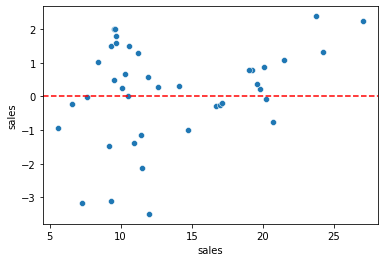

In [49]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(ls='--',c='r')

In [50]:
len(test_res)

40

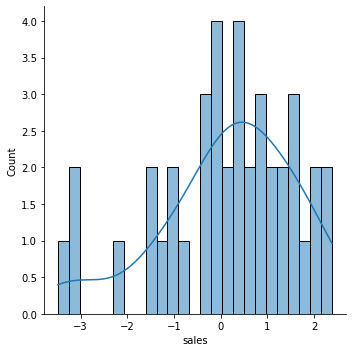

In [51]:
sns.displot(test_res,bins=25,kde=True)

In [52]:
len(test_predictions)

40

In [53]:
MSE

2.063418850121476

In [54]:
MAE

1.1244750006255646

In [55]:
RMSE

1.43646052856369

In [56]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [57]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [58]:
model

LinearRegression()

In [59]:
model.predict(X_test)

array([15.68292592, 19.58907536, 11.33442246, 16.97160642,  9.00229777,
        6.8258424 , 20.28370847, 17.25050474,  9.62422935, 19.21261943,
       12.28165709, 13.79124205, 13.63171832, 21.3166205 , 18.4260183 ,
        9.83360121, 15.48826256,  7.50717778,  7.37608168, 20.40569824,
        7.61221263, 18.21702553, 24.75227276, 22.87105326,  7.79566192,
       12.55620637, 21.47155589,  7.89397664, 12.3119109 , 12.41822104,
       10.6650977 , 19.23984433,  9.92216352,  6.53329195, 17.27904496,
        7.60035587,  9.1023379 ,  8.10416927, 10.45284718, 10.49584758])

In [60]:
final_model=LinearRegression()
final_model

LinearRegression()

In [61]:
final_model.fit(X,y)

LinearRegression()

In [62]:
y_hat=final_model.predict(X)
y_hat

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [63]:
len(y_hat)

200

In [64]:
mean_absolute_error(y,y_hat)

1.2520112296870685

In [65]:
MAE

1.1244750006255646

In [66]:
MSE

2.063418850121476

In [67]:
mean_squared_error(y,y_hat)

2.784126314510936

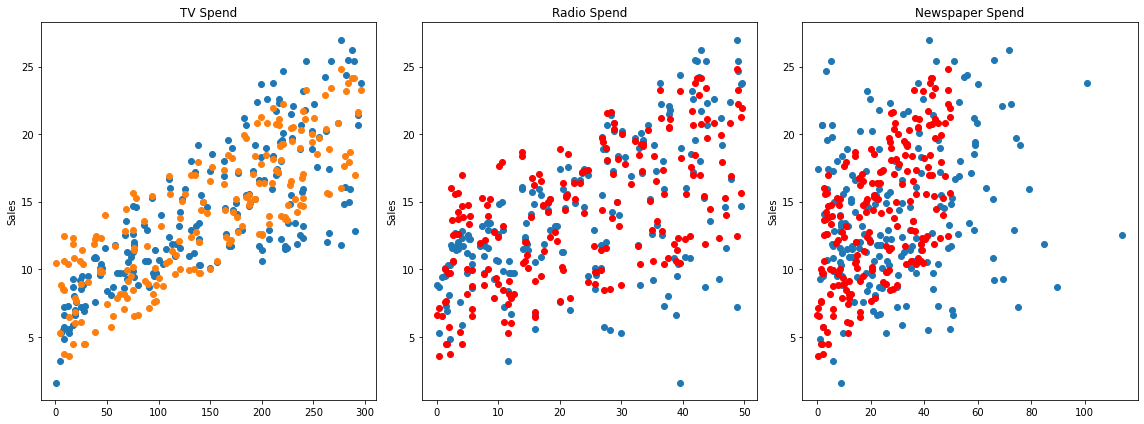

In [68]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

<AxesSubplot:xlabel='TV', ylabel='sales'>

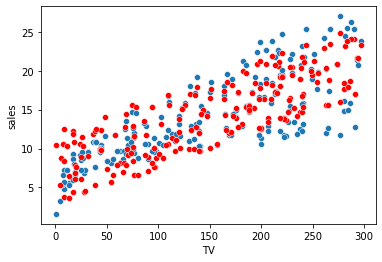

In [69]:
sns.scatterplot(x='TV',y='sales',data=df)
sns.scatterplot(x='TV',y=y_hat,data=df,color='r')


In [70]:
residuals = y_hat - y

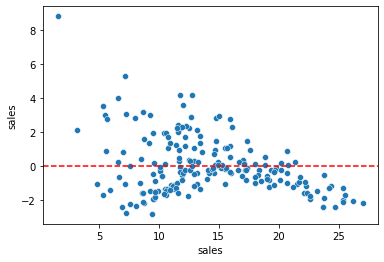

In [71]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

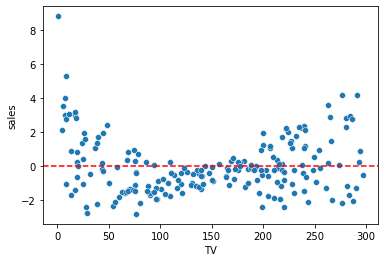

In [73]:
sns.scatterplot(x='TV',y=residuals,data=df)
plt.axhline(y=0, color='r', linestyle='--')

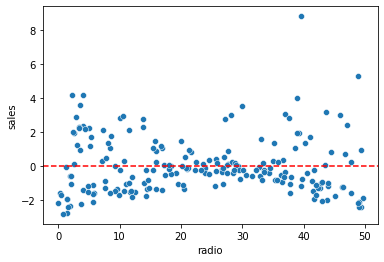

In [74]:
sns.scatterplot(x='radio',y=residuals,data=df)
plt.axhline(y=0, color='r', linestyle='--')

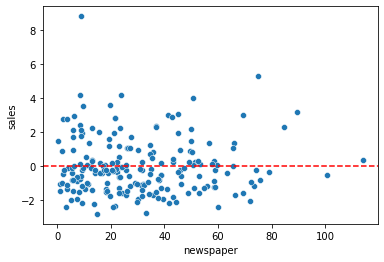

In [76]:
sns.scatterplot(x='newspaper',y=residuals,data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [78]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [79]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [84]:
camp=[[149,22,12]]

In [85]:
final_model.predict(camp)

array([13.893032])

In [87]:
final_model.predict([[161,22,0]])

array([14.45465766])

In [98]:
final_model.predict([[0,183,0]])

array([37.43988247])

In [99]:
from joblib import dump,load

In [100]:
dump(final_model,'sales_model.joblib')

['sales_model.joblib']

In [101]:
loaded_model=load('sales_model.joblib')

In [102]:
loaded_model.predict(camp)

array([13.893032])